# JustDice Recruitment Challenge
The Case Exercise

Disaster has occurred at JustDice!
The data team, alongside the management team, were scuba diving on an offsite event at the Caribbean, they were mauled to death by vicious sea turtles (don’t worry we are fine).

You have just been hired, alongside a new CEO, and management team to replace the old employees.

Your task is to help the leadership team to understand the overall financial situation of the company, its main KPIs, as well as any relevant findings that can be driven from the data.

The only tools at hand are a handful of undocumented data, your brain and wits.

The deliverable should be a zip or repository, containing whatever code you used, as well as a presentation of your findings (in any format of your liking) to the new management team.

The stakeholders that will be attending are responsible for the overall financial condition, the user acquisition process, and the products (apps & payout service). 

They may have different concerns regarding the company and its processes.

## Solution and Analysis

I have chosen a jupyter notebook to analyse the datasets.


### Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Loading datasets in to pandas dataframes


In [2]:
#reading data from csv to Pandas Dataframes
df_revenue = pd.read_csv('revenue.csv')
df_installs = pd.read_csv('installs.csv')
df_adspend = pd.read_csv('adspend.csv')
df_payouts = pd.read_csv('payouts.csv')

## Analysis

### 1. Revenue Analysis

#### Revenue Generated by Apps

In [3]:
# Converting the date column to datetime format
df_revenue['event_date'] = pd.to_datetime(df_revenue['event_date'])

# Calculating daily revenue
daily_revenue = df_revenue.groupby('event_date')['value_usd'].sum().reset_index()

# Calculating weekly revenue
weekly_revenue = df_revenue.groupby(pd.Grouper(key='event_date', freq='W-MON'))['value_usd'].sum().reset_index()

# Calculating monthly revenue
monthly_revenue = df_revenue.groupby(pd.Grouper(key='event_date', freq='M'))['value_usd'].sum().reset_index()


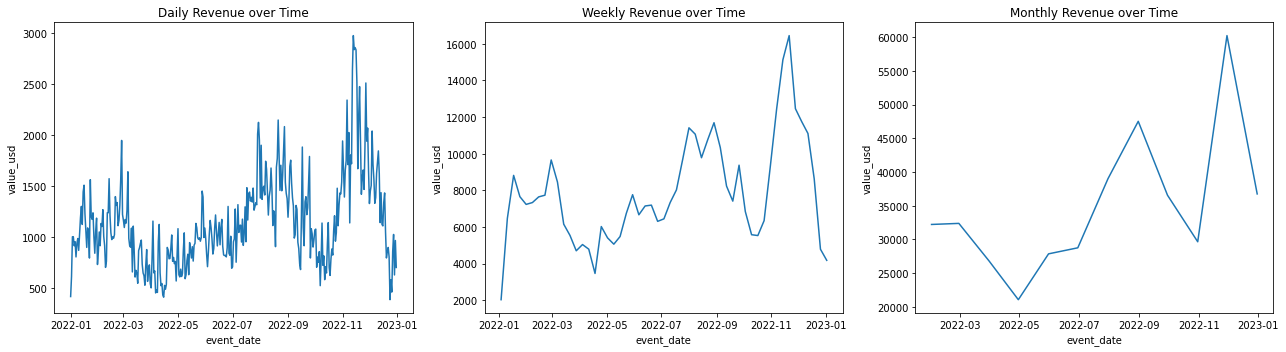

In [4]:
# Creating figure and subplots
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))

# Plot 1:  Daily Revenue over Time
sns.lineplot(x="event_date", y="value_usd",data=daily_revenue,ax=axs[0])
axs[0].set_title("Daily Revenue over Time")

# Plot 2:  Weekly Revenue over Time
sns.lineplot(x="event_date", y="value_usd",data=weekly_revenue,ax=axs[1])
axs[1].set_title("Weekly Revenue over Time")

# Plot 3: Monthly Revenue over Time
sns.lineplot(x="event_date", y="value_usd",data=monthly_revenue,ax=axs[2])
axs[2].set_title("Monthly Revenue over Time")

# Adjusting spacing between subplots
plt.tight_layout()

# Show plot
plt.show()

#### Highest revenue Day 

In [5]:
daily_revenue.sort_values("value_usd", ascending=False).head(1)

,event_date,value_usd
316,2022-11-13,2973.450882


#### Highest revenue Week

In [6]:
weekly_revenue.sort_values("value_usd", ascending=False).head(1)

,event_date,value_usd
46,2022-11-21,16449.458551


#### Highest revenue Month

In [7]:
monthly_revenue.sort_values("value_usd", ascending=False).head(1)

,event_date,value_usd
10,2022-11-30,60208.890172


#### Forecast for next 5 weeks using ARIMA Stats Model

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


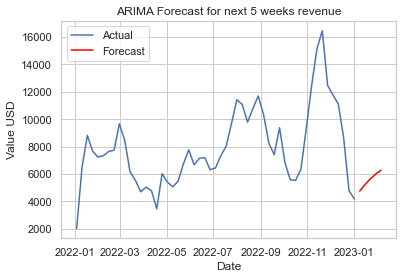

In [28]:

from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Load the data
df = weekly_revenue.reset_index()

# Convert the date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Set the date column as the index
df = df.set_index('event_date')

# Plot the time series
register_matplotlib_converters()
plt.plot(df)

# Fit an ARIMA model
model = ARIMA(df, order=(1, 0, 0))
model_fit = model.fit()

# Forecast the next 5 weeks
forecast = model_fit.forecast(steps=5)

# Plot the forecasted values
plt.plot(forecast, color='red')
plt.legend(['Actual', 'Forecast'])
plt.title('ARIMA Forecast for next 5 weeks revenue')
plt.xlabel('Date')
plt.ylabel('Value USD')
plt.show()


--------------------------
--------------------------

### 2. Installation Analysis

#### Distribution of Network versions across different countries

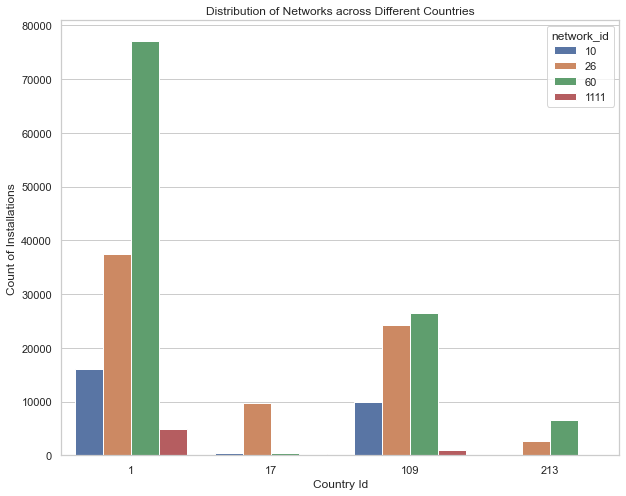

In [8]:
# Creating a countplot to visualize the distribution of Network versions across different countries
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.countplot(x='country_id', hue='network_id', data=df_installs)
plt.title('Distribution of Networks across Different Countries')
plt.xlabel('Country Id')
plt.ylabel('Count of Installations')
plt.show()

**Network '60' is the most used network in all countries.**

#### Finding the most popular app and network combinations for each country
Grouping of country, app, and network and count the number of occurrences

In [9]:
# Grouping the data by country, app, and network and count the number of occurrences
grouped_data = df_installs.groupby(['country_id', 'app_id', 'network_id']).size().reset_index(name='count')

# Finding the most popular app and network combinations for each country
top_combinations = grouped_data.groupby('country_id').apply(lambda x: x.loc[x['count'].idxmax()]).reset_index(drop=True)
top_combinations

,country_id,app_id,network_id,count
0,1,174,60,27850
1,17,370,26,3558
2,109,174,60,10176
3,213,189,60,3593


App_id: 74 is the most installed app. It is most installed in Country_id: 1.

#### Monthly installations

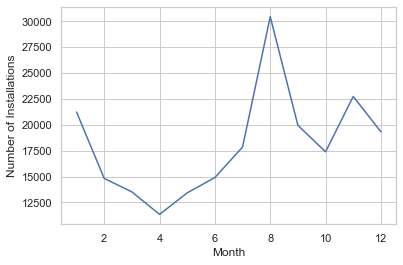

In [10]:

# Convert the event_date column to datetime format
df_installs['event_date'] = pd.to_datetime(df_installs['event_date'])

# Extract the month from the event_date column
df_installs['month'] = df_installs['event_date'].dt.month

# Group the data by month and count the number of unique install_id
monthly_installations = df_installs.groupby('month')['install_id'].nunique()

# Plot the monthly installations
fig, ax = plt.subplots()
ax.plot(monthly_installations.index, monthly_installations.values)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Installations')
plt.show()


### Weekly Installations per country

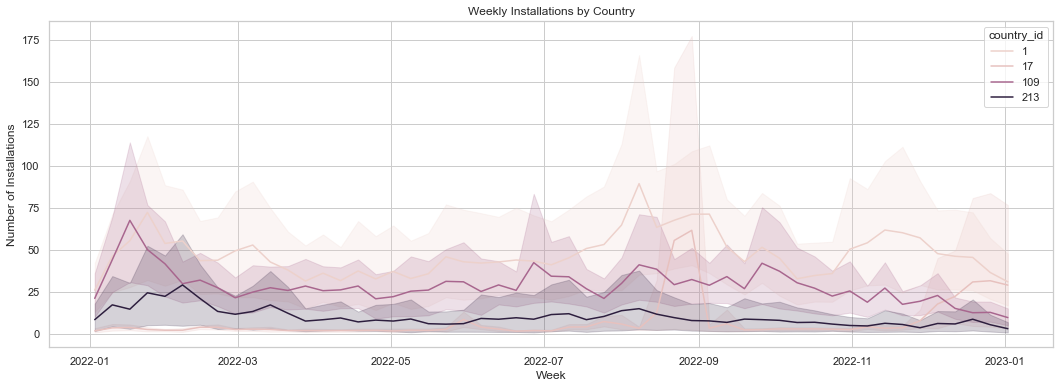

In [35]:

df = df_installs

# Convert event_date column to datetime type
df['event_date'] = pd.to_datetime(df['event_date'])

# Group the data by country, app, network and week, and count the number of installations
weekly_data = df.groupby(['country_id', 'app_id', 'network_id', pd.Grouper(key='event_date', freq='W-MON')])['install_id'].count().reset_index()


plt.figure(figsize=(18, 6))
sns.lineplot(data=weekly_data, x='event_date', y='install_id', hue='country_id')
plt.title('Weekly Installations by Country')
plt.xlabel('Week')
plt.ylabel('Number of Installations')
plt.show()


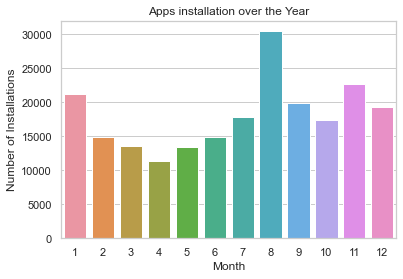

In [11]:
# group data by months and count number of installations in each month
month_counts = df_installs.groupby('month')['install_id'].nunique().reset_index()
month_counts = month_counts.rename(columns={'install_id': 'Installations'})
sns.barplot(x = "month" , y ="Installations", data=month_counts)
plt.xlabel('Month')
plt.ylabel('Number of Installations')
plt.title('Apps installation over the Year')
plt.show()

**Number of installations is least in 4th Month and it is at the peak in the 8th Month of the year.**

#### Installation by Country

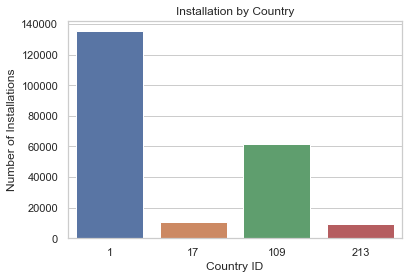

In [12]:
# group data by country ID and count number of users in each country
country_counts = df_installs.groupby('country_id')['install_id'].nunique().reset_index()
country_counts = country_counts.rename(columns={'install_id': 'Installations'})
sns.barplot(x = "country_id" , y ="Installations", data=country_counts)
plt.xlabel('Country ID')
plt.ylabel('Number of Installations')
plt.title('Installation by Country')
plt.show()


#### Installation by Networks

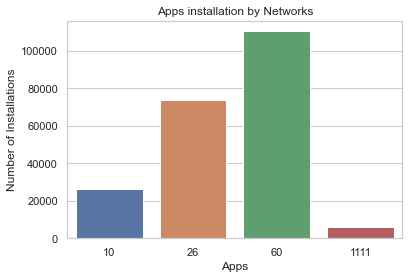

In [13]:
# group data by Network and count number of users of each network
network_counts = df_installs.groupby('network_id')['install_id'].nunique().reset_index()
network_counts = network_counts.rename(columns={'install_id': 'Installations'})
sns.barplot(x = "network_id" , y ="Installations", data=network_counts)
plt.xlabel('Apps')
plt.ylabel('Number of Installations')
plt.title('Apps installation by Networks')
plt.show()

#### **Observations**:

- Highest Installations in 8th month
- Lowest number of installations in 4th month
- Most frequent country = Country_id = 1
- Most used Network = 60


---------------------------   
--------------------------

### 3. AdSpend Analysis

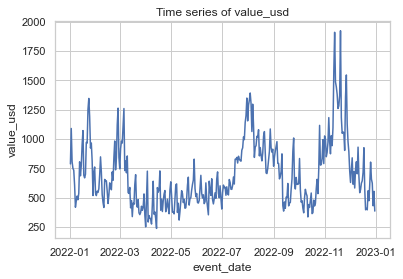

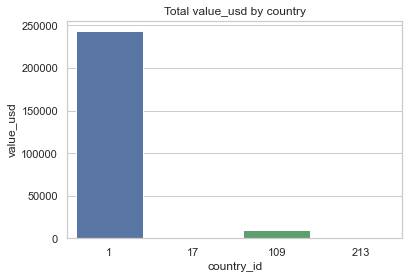

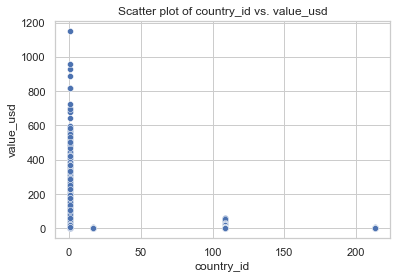

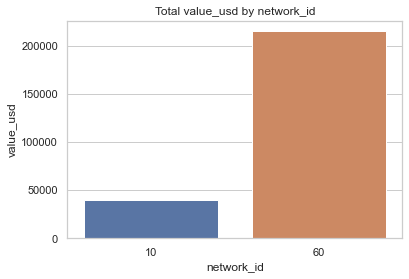

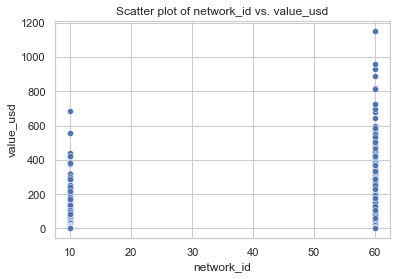

In [14]:

df = df_adspend

# Time series analysis
df['event_date'] = pd.to_datetime(df['event_date'])
df_ts = df.groupby('event_date')['value_usd'].sum()
sns.lineplot(x=df_ts.index, y=df_ts)
plt.title('Time series of value_usd')
plt.xlabel('event_date')
plt.ylabel('value_usd')
plt.show()

# Grouping by country_id
df_country = df.groupby('country_id')['value_usd'].sum()
sns.barplot(x=df_country.index, y=df_country)
plt.title('Total value_usd by country')
plt.xlabel('country_id')
plt.ylabel('value_usd')
plt.show()

# Correlation between value_usd and network_id
sns.scatterplot(x='country_id', y='value_usd', data=df)
plt.title('Scatter plot of country_id vs. value_usd')
plt.show()


# Grouping by network
df_network = df.groupby('network_id')['value_usd'].sum()
sns.barplot(x=df_network.index, y=df_network)
plt.title('Total value_usd by network_id')
plt.xlabel('network_id')
plt.ylabel('value_usd')
plt.show()

# Correlation between value_usd and network_id
sns.scatterplot(x='network_id', y='value_usd', data=df)
plt.title('Scatter plot of network_id vs. value_usd')
plt.show()



Highest adspending Day.

In [15]:
df_ts =df_ts.reset_index()
df_ts.sort_values(by=['value_usd'], ascending=False).head(1)

,event_date,value_usd
323,2022-11-20,1921.626018


Lowest adspending Day.

In [16]:
df_ts.sort_values(by=['value_usd'], ascending=False).tail(1)

,event_date,value_usd
103,2022-04-14,236.591001


Highest adspending Client.

In [17]:
df_adspend.sort_values(by=['value_usd'], ascending=False).head(1)

,event_date,country_id,network_id,client_id,value_usd
10494,2022-11-13,1,60,174,1152.598013


#### Adspend forecasting

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47890D+00    |proj g|=  4.38149D-02

At iterate    5    f=  6.44899D+00    |proj g|=  4.28009D-02

At iterate   10    f=  6.44151D+00    |proj g|=  4.44048D-03

At iterate   15    f=  6.44126D+00    |proj g|=  1.35843D-04

At iterate   20    f=  6.44123D+00    |proj g|=  1.55535D-03

At iterate   25    f=  6.43691D+00    |proj g|=  1.92132D-02

At iterate   30    f=  6.42626D+00    |proj g|=  9.76619D-03

At iterate   35    f=  6.42560D+00    |proj g|=  9.18754D-04

At iterate   40    f=  6.42519D+00    |proj g|=  3.00544D-03

At iterate   45    f=  6.42509D+00    |proj g|=  8.26934D-04

At iterate   50    f=  6.42507D+00    |proj g|=  1.05498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


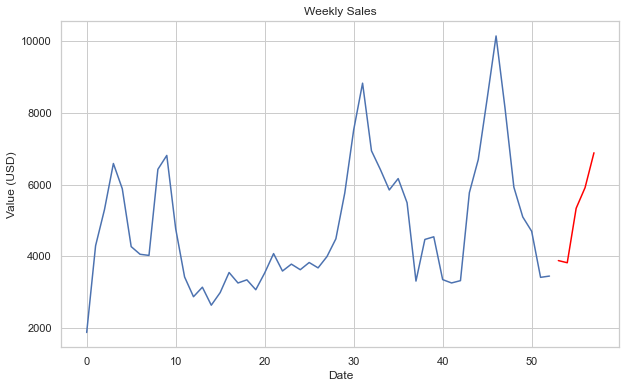

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Read in the data
data = df_adspend.reset_index()

# Convert the event_date column to a datetime object and set it as the index
data['event_date'] = pd.to_datetime(data['event_date'])
data.set_index('event_date', inplace=True)

# Group the data by months and compute the sum of the value_usd column for each month
weekly_data = data.groupby(pd.Grouper(freq='W')).sum().reset_index()

# Create and fit the SARIMAX model
model = SARIMAX(weekly_data['value_usd'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Get the forecasted values and the confidence intervals
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
print('Forecast for next 5 weeks',forecast_mean)
# Plot the actual values and the forecasted values
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_data, x=weekly_data.index, y='value_usd')
sns.lineplot(x=forecast_mean.index, y=forecast_mean.values, color='red')
plt.xlabel('Date')
plt.ylabel('Value (USD)')
plt.title('Weekly Sales')
plt.show()


#### **Observations**:

- Highest spending on 2022-11-20
- Lowest spending on 2022-04-14
- Most frequent country = Country_id = 1
- Most used Network = 60
- Client 174 belonging to country_id: 1 and having network_id:60 has to hiighest ad spending, i.e. 1153 usd.


---------------------
---------------------

### 4. Payouts Analysis

Total payouts:  62320.91676900001


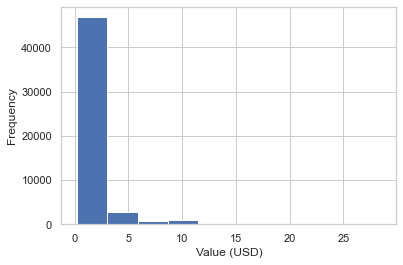

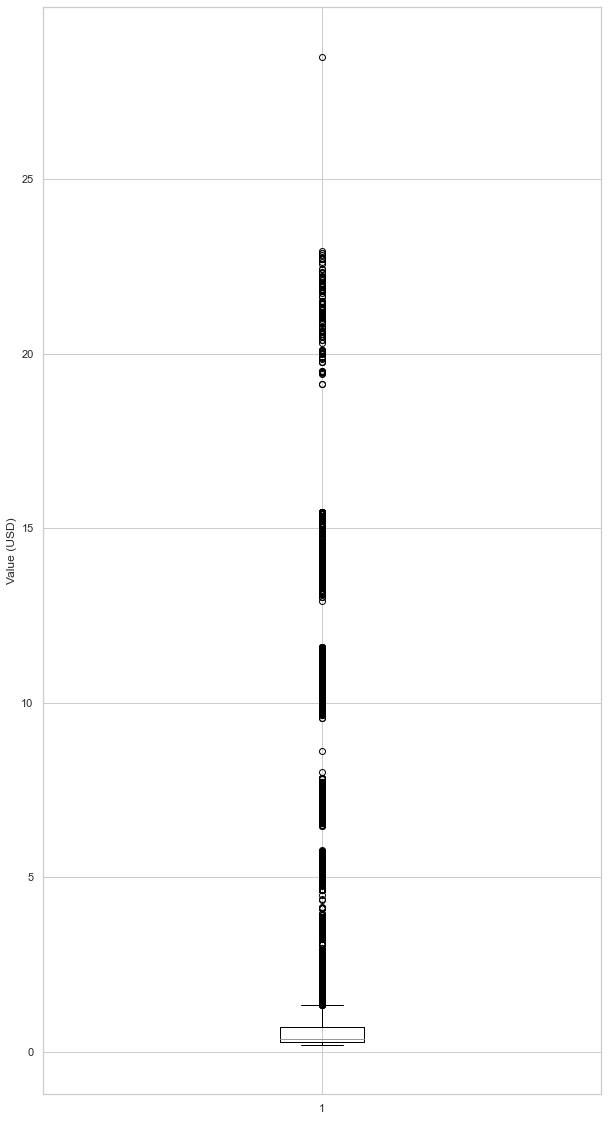

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
data = df_payouts

# Calculate the total revenue
total_payouts = data['value_usd'].sum()
print("Total payouts: ",total_payouts)
# Calculate the average _payouts per user
avg_payout_per_user = data.groupby('install_id')['value_usd'].mean()

# Plot a histogram of revenue
plt.hist(data['value_usd'], bins=10)
plt.xlabel('Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot of revenue
plt.figure(figsize=(10, 20))
plt.boxplot(data['value_usd'])
plt.ylabel('Value (USD)')
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53166D+00    |proj g|=  3.31916D-01

At iterate    5    f=  5.44569D+00    |proj g|=  1.28781D-02

At iterate   10    f=  5.43434D+00    |proj g|=  8.61264D-03

At iterate   15    f=  5.43265D+00    |proj g|=  5.95649D-04

At iterate   20    f=  5.43233D+00    |proj g|=  1.26208D-03

At iterate   25    f=  5.42835D+00    |proj g|=  2.77991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   

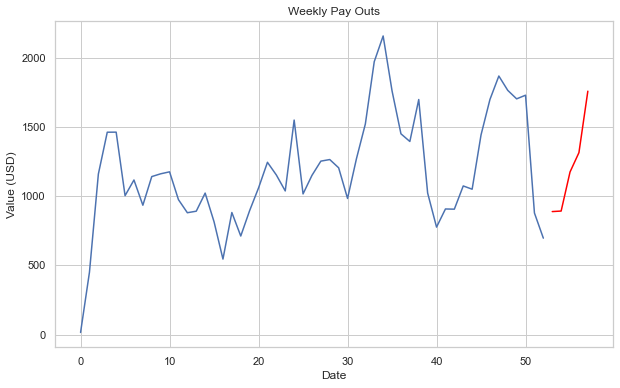

In [22]:
data = df_payouts

# Convert the event_date column to a datetime object and set it as the index
data['event_date'] = pd.to_datetime(data['event_date'])
data.set_index('event_date', inplace=True)

# Group the data by months and compute the sum of the value_usd column for each month
weekly_data = data.groupby(pd.Grouper(freq='W')).sum().reset_index()

# Create and fit the SARIMAX model
model = SARIMAX(weekly_data['value_usd'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Get the forecasted values and the confidence intervals
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
print('Forecast for next 5 weeks',forecast_mean)
# Plot the actual values and the forecasted values
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_data, x=weekly_data.index, y='value_usd')
sns.lineplot(x=forecast_mean.index, y=forecast_mean.values, color='red')
plt.xlabel('Date')
plt.ylabel('Value (USD)')
plt.title('Weekly Pay Outs')
plt.show()

#### Observations:
- Total payouts:  62321 usd
- Most of the payouts range from 0-2 usds.


## Remarks:

The timeseries forecasting give an estimate of future installations, revenue, adspends and payouts.

The analysis produced valuable information and findings that will aid the new management team in comprehending the company's general financial situation, its key performance indicators, and any pertinent conclusions that can be drawn from the data. By including more data about the company's financial position, such as the costs of operating the business, profits, and return on investment, the presentation of the findings could be strengthened.
